<a href="https://colab.research.google.com/github/SambadRupakheti/Sambad.Rupakheti.BDAT1004PS3/blob/main/Sambad_Rupakheti_BDAT1004PS3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Question 1**

Occupations

In [2]:
# Step 1: Importing necessary libraries
import pandas as pd
import numpy as np


In [3]:
# Step 2 and 3: Importing dataset from provided address and assigning it to variable called users
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'
users = pd.read_csv(url, sep='|')  # Separator is '|'


In [4]:
# Step 4: Mean age per occupation
mean_age_per_occupation = users.groupby('occupation')['age'].mean()
mean_age_per_occupation


,age
occupation,
administrator,38.746835
artist,31.392857
doctor,43.571429
educator,42.010526
engineer,36.388060
entertainment,29.222222
executive,38.718750
healthcare,41.562500
homemaker,32.571429


In [5]:
# Step 5: Male ratio per occupation
def calculate_male_ratio(df):
    gender_count = df.groupby(['occupation', 'gender']).size().unstack()
    male_ratio = (gender_count['M'] / gender_count.sum(axis=1)) * 100
    return male_ratio.sort_values(ascending=False)

male_ratio_per_occupation = calculate_male_ratio(users)
male_ratio_per_occupation


,0
occupation,
doctor,100.000000
engineer,97.014925
technician,96.296296
retired,92.857143
programmer,90.909091
executive,90.625000
scientist,90.322581
entertainment,88.888889
lawyer,83.333333


In [6]:
# Step 6: Minimum and maximum ages per occupation
min_max_age_per_occupation = users.groupby('occupation')['age'].agg(['min', 'max'])
min_max_age_per_occupation


,min,max
occupation,,
administrator,21,70
artist,19,48
doctor,28,64
educator,23,63
engineer,22,70
entertainment,15,50
executive,22,69
healthcare,22,62
homemaker,20,50


In [7]:
# Step 7: Mean age per occupation and gender
mean_age_per_occupation_gender = users.groupby(['occupation', 'gender'])['age'].mean()
mean_age_per_occupation_gender


occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.166667
               M         33.216667
retired        F         70.000000
               M         62.538462
salesman       F         27.000000
               M         38.555556
scientist      F         28.333333
               M         36.321429
student        F         20.750000
               M         22.669118
technician     F         38.000000
               M         32.961538
writer         F         37.631579
               M         35.346154
Name: age, dtype: float64

In [8]:
# Step 8: Gender percentage per occupation
def calculate_gender_percentage(df):
    gender_count = df.groupby(['occupation', 'gender']).size().unstack()
    gender_percent = gender_count.div(gender_count.sum(axis=1), axis=0) * 100
    return gender_percent

gender_percentage_per_occupation = calculate_gender_percentage(users)
gender_percentage_per_occupation


gender,F,M
occupation,,
administrator,45.569620,54.430380
artist,46.428571,53.571429
doctor,NaN,100.000000
educator,27.368421,72.631579
engineer,2.985075,97.014925
entertainment,11.111111,88.888889
executive,9.375000,90.625000
healthcare,68.750000,31.250000
homemaker,85.714286,14.285714


**Question 2**

Euro Teams


In [10]:
# Step 1: Importing necessary libraries
import pandas as pd
import numpy as np

In [11]:
# Step 2: Loading dataset and assigning it to euro12
url_euro12 = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv'
euro12 = pd.read_csv(url_euro12)

In [12]:
# Step 3: Displaying first few rows to confirm data is loaded
euro12.head()


,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19


In [13]:
# Step 4: Selecting Goals column
goals = euro12['Goals']
goals


,Goals
0,4
1,4
2,4
3,5
4,3
5,10
6,5
7,6
8,2
9,2


In [14]:
# Step 5: Number of teams participated in the Euro2012
num_teams = euro12['Team'].nunique()
num_teams

16

In [15]:
# Step 6: Number of columns
num_columns = euro12.shape[1]
num_columns

35

In [16]:
# Step 7: Viewing only the columns Team, Yellow Cards and Red Cards and assign them
to a dataframe called discipline
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline

,Team,Yellow Cards,Red Cards
0,Croatia,9,0
1,Czech Republic,7,0
2,Denmark,4,0
3,England,5,0
4,France,6,0
5,Germany,4,0
6,Greece,9,1
7,Italy,16,0
8,Netherlands,5,0
9,Poland,7,1


In [17]:
# Step 8: Sort teams by Red Cards and Yellow Cards
discipline_sorted = discipline.sort_values(by=['Red Cards', 'Yellow Cards'], ascending=[False, False])
discipline_sorted

,Team,Yellow Cards,Red Cards
6,Greece,9,1
9,Poland,7,1
11,Republic of Ireland,6,1
7,Italy,16,0
10,Portugal,12,0
13,Spain,11,0
0,Croatia,9,0
1,Czech Republic,7,0
14,Sweden,7,0
4,France,6,0


In [18]:
# Step 9: Mean Yellow Cards per team
mean_yellow_cards = discipline['Yellow Cards'].mean()
mean_yellow_cards

7.4375

In [20]:
# Step 10: Teams that scored more than 6 goals
teams_more_than_6_goals = euro12[euro12['Goals'] > 6]
teams_more_than_6_goals

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
13,Spain,12,42,33,55.9%,16.0%,100,0,1,0,...,15,93.8%,102,83,19,11,0,17,17,18


In [21]:
# Step 11: Teams starting with 'G'
teams_starting_with_g = euro12[euro12['Team'].str.startswith('G')]
teams_starting_with_g

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20


In [22]:
# Step 12: First 7 columns
first_7_columns = euro12.iloc[:, :7]
first_7_columns

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked)
0,Croatia,4,13,12,51.9%,16.0%,32
1,Czech Republic,4,13,18,41.9%,12.9%,39
2,Denmark,4,10,10,50.0%,20.0%,27
3,England,5,11,18,50.0%,17.2%,40
4,France,3,22,24,37.9%,6.5%,65
5,Germany,10,32,32,47.8%,15.6%,80
6,Greece,5,8,18,30.7%,19.2%,32
7,Italy,6,34,45,43.0%,7.5%,110
8,Netherlands,2,12,36,25.0%,4.1%,60
9,Poland,2,15,23,39.4%,5.2%,48


In [23]:
# Step 13: All columns except the last 3
columns_except_last_3 = euro12.iloc[:, :-3]
columns_except_last_3

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Clean Sheets,Blocks,Goals conceded,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,0,10,3,13,81.3%,41,62,2,9,0
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,1,10,6,9,60.1%,53,73,8,7,0
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,1,10,5,10,66.7%,25,38,8,4,0
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,2,29,3,22,88.1%,43,45,6,5,0
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,1,7,5,6,54.6%,36,51,5,6,0
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,1,11,6,10,62.6%,63,49,12,4,0
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,1,23,7,13,65.1%,67,48,12,9,1
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,2,18,7,20,74.1%,101,89,16,16,0
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,0,9,5,12,70.6%,35,30,3,5,0
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,0,8,3,6,66.7%,48,56,3,7,1


In [24]:
# Step 14: Shooting Accuracy for England, Italy, and Russia
shooting_accuracy_selected = euro12[euro12['Team'].isin(['England', 'Italy', 'Russia'])][['Team', 'Shooting Accuracy']]
shooting_accuracy_selected

,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


**Question 3**

Housing

In [25]:
# Step 1: Importing necessary libraries
import pandas as pd
import numpy as np

In [26]:
# Step 2: Creating 3 different Series
np.random.seed(42)  # For reproducibility
series1 = pd.Series(np.random.randint(1, 5, size=100))  # Random numbers from 1 to 4
series2 = pd.Series(np.random.randint(1, 4, size=100))  # Random numbers from 1 to 3
series3 = pd.Series(np.random.randint(10000, 30001, size=100))  # Random numbers from 10000 to 30000

In [28]:
# Step 3 and 4: Creating DataFrame and renaming columns
df_housing = pd.DataFrame({'bedrs': series1, 'bathrs': series2, 'price_sqr_meter': series3})
df_housing

,bedrs,bathrs,price_sqr_meter
0,3,3,23931
1,4,2,13627
2,1,2,26157
3,3,2,20173
4,3,2,28047
...,...,...,...
95,2,1,11154
96,2,2,14499
97,4,1,16295
98,2,1,22183


In [30]:
# Step 5: Creating a single-column DataFrame and assigning it to bigcolumn
bigcolumn = pd.concat([series1, series2, series3], axis=0).reset_index(drop=True)
bigcolumn_df = pd.DataFrame(bigcolumn, columns=['bigcolumn'])
bigcolumn_df

,bigcolumn
0,3
1,4
2,1
3,3
4,3
...,...
295,11154
296,14499
297,16295
298,22183


In [31]:
# Step 6: Checking the index
bigcolumn_df.index

RangeIndex(start=0, stop=300, step=1)

In [33]:
# Step 7: Reindexing to ensure the range 0–299 eventhough not needed as step 6 indicated that bigcolumn_df already covers the range from 0 to 299
bigcolumn_df_reindexed = bigcolumn_df.reset_index(drop=True)  # Resetting index
bigcolumn_df_reindexed.index = range(300)  # Explicitly setting index range
bigcolumn_df_reindexed


,bigcolumn
0,3
1,4
2,1
3,3
4,3
...,...
295,11154
296,14499
297,16295
298,22183


**Questin 4**

Wind Statistics

In [64]:
# Step 1: Importing necessary libraries
import pandas as pd
import numpy as np

In [65]:
# Uploading file
from google.colab import files
files.upload()

Saving wind.txt to wind (2).txt


{'wind (2).txt': b'Yr Mo Dy   RPT   VAL   ROS   KIL   SHA   BIR   DUB   CLA   MUL   CLO   BEL   MAL\r\n61  1  1 15.04 14.96 13.17  9.29   NaN  9.87 13.67 10.25 10.83 12.58 18.50 15.04\r\n61  1  2 14.71   NaN 10.83  6.50 12.62  7.67 11.50 10.04  9.79  9.67 17.54 13.83\r\n61  1  3 18.50 16.88 12.33 10.13 11.17  6.17 11.25   NaN  8.50  7.67 12.75 12.71\r\n61  1  4 10.58  6.63 11.75  4.58  4.54  2.88  8.63  1.79  5.83  5.88  5.46 10.88\r\n61  1  5 13.33 13.25 11.42  6.17 10.71  8.21 11.92  6.54 10.92 10.34 12.92 11.83\r\n61  1  6 13.21  8.12  9.96  6.67  5.37  4.50 10.67  4.42  7.17  7.50  8.12 13.17\r\n61  1  7 13.50 14.29  9.50  4.96 12.29  8.33  9.17  9.29  7.58  7.96 13.96 13.79\r\n61  1  8 10.96  9.75  7.62  5.91  9.62  7.29 14.29  7.62  9.25 10.46 16.62 16.46\r\n61  1  9 12.58 10.83 10.00  4.75 10.37  6.79  8.04 10.13  7.79  9.08 13.04 15.37\r\n61  1 10 13.37 11.12 19.50  8.33  9.71  6.54 11.42  7.79  8.54  9.00  8.58 11.83\r\n61  1 11 10.58  9.87  8.42  2.79  8.71  7.25  7.54  8.33 

In [66]:
# Step 2: Load dataset
wind_data = pd.read_csv('wind.txt', sep='\s+', skiprows=1, header=None)

# Add proper column names
columns = ['Yr', 'Mo', 'Dy', 'RPT', 'VAL', 'ROS', 'KIL', 'SHA', 'BIR', 'DUB', 'CLA', 'MUL', 'CLO', 'BEL', 'MAL']
wind_data.columns = columns

# Display the first few rows to confirm
wind_data.head()

,Yr,Mo,Dy,RPT,VAL,ROS,KIL,SHA,BIR,DUB,CLA,MUL,CLO,BEL,MAL
0,61,1,1,15.04,14.96,13.17,9.29,NaN,9.87,13.67,10.25,10.83,12.58,18.50,15.04
1,61,1,2,14.71,NaN,10.83,6.50,12.62,7.67,11.50,10.04,9.79,9.67,17.54,13.83
2,61,1,3,18.50,16.88,12.33,10.13,11.17,6.17,11.25,NaN,8.50,7.67,12.75,12.71
3,61,1,4,10.58,6.63,11.75,4.58,4.54,2.88,8.63,1.79,5.83,5.88,5.46,10.88
4,61,1,5,13.33,13.25,11.42,6.17,10.71,8.21,11.92,6.54,10.92,10.34,12.92,11.83


In [67]:
# Reload dataset
wind_data = pd.read_csv('wind.txt', sep='\s+', skiprows=1, header=None)

# Assign proper column names
columns = ['Yr', 'Mo', 'Dy', 'RPT', 'VAL', 'ROS', 'KIL', 'SHA', 'BIR', 'DUB', 'CLA', 'MUL', 'CLO', 'BEL', 'MAL']
wind_data.columns = columns

# Display the first few rows to confirm structure
print(wind_data.head())


   Yr  Mo  Dy    RPT    VAL    ROS    KIL    SHA   BIR    DUB    CLA    MUL  \
0  61   1   1  15.04  14.96  13.17   9.29    NaN  9.87  13.67  10.25  10.83   
1  61   1   2  14.71    NaN  10.83   6.50  12.62  7.67  11.50  10.04   9.79   
2  61   1   3  18.50  16.88  12.33  10.13  11.17  6.17  11.25    NaN   8.50   
3  61   1   4  10.58   6.63  11.75   4.58   4.54  2.88   8.63   1.79   5.83   
4  61   1   5  13.33  13.25  11.42   6.17  10.71  8.21  11.92   6.54  10.92   

     CLO    BEL    MAL  
0  12.58  18.50  15.04  
1   9.67  17.54  13.83  
2   7.67  12.75  12.71  
3   5.88   5.46  10.88  
4  10.34  12.92  11.83  


In [68]:
# Check for missing or invalid data in Yr, Mo, Dy
print(wind_data[['Yr', 'Mo', 'Dy']].apply(pd.to_numeric, errors='coerce').isna().any())

# Display rows with invalid values
print(wind_data[wind_data[['Yr', 'Mo', 'Dy']].apply(pd.to_numeric, errors='coerce').isna().any(axis=1)])


Yr    False
Mo    False
Dy    False
dtype: bool
Empty DataFrame
Columns: [Yr, Mo, Dy, RPT, VAL, ROS, KIL, SHA, BIR, DUB, CLA, MUL, CLO, BEL, MAL]
Index: []


In [69]:
# Step 3: Ensure Yr, Mo, Dy are integers
wind_data[['Yr', 'Mo', 'Dy']] = wind_data[['Yr', 'Mo', 'Dy']].astype(int)

# Adjust shorthand year (e.g., 61 becomes 1961)
wind_data['Yr'] = wind_data['Yr'] + 2000

# Combine Yr, Mo, Dy into a datetime index
wind_data['Date'] = pd.to_datetime(
    wind_data[['Yr', 'Mo', 'Dy']].rename(columns={'Yr': 'year', 'Mo': 'month', 'Dy': 'day'})
)

# Set the 'Date' column as the index
wind_data.set_index('Date', inplace=True)

# Drop the original Yr, Mo, Dy columns
wind_data.drop(columns=['Yr', 'Mo', 'Dy'], inplace=True)

# Display the first few rows to confirm
print(wind_data.head())


              RPT    VAL    ROS    KIL    SHA   BIR    DUB    CLA    MUL  \
Date                                                                       
2061-01-01  15.04  14.96  13.17   9.29    NaN  9.87  13.67  10.25  10.83   
2061-01-02  14.71    NaN  10.83   6.50  12.62  7.67  11.50  10.04   9.79   
2061-01-03  18.50  16.88  12.33  10.13  11.17  6.17  11.25    NaN   8.50   
2061-01-04  10.58   6.63  11.75   4.58   4.54  2.88   8.63   1.79   5.83   
2061-01-05  13.33  13.25  11.42   6.17  10.71  8.21  11.92   6.54  10.92   

              CLO    BEL    MAL  
Date                             
2061-01-01  12.58  18.50  15.04  
2061-01-02   9.67  17.54  13.83  
2061-01-03   7.67  12.75  12.71  
2061-01-04   5.88   5.46  10.88  
2061-01-05  10.34  12.92  11.83  


In [70]:
# Step 4: Fix incorrect years (2061 to 1961)
def fix_year_2061(date_index):
    return date_index.map(lambda d: d.replace(year=1961) if d.year == 2061 else d)

# Apply the function to the index
wind_data.index = fix_year_2061(wind_data.index)

# Confirm the corrected index
print(wind_data.index)


DatetimeIndex(['1961-01-01', '1961-01-02', '1961-01-03', '1961-01-04',
               '1961-01-05', '1961-01-06', '1961-01-07', '1961-01-08',
               '1961-01-09', '1961-01-10',
               ...
               '2078-12-22', '2078-12-23', '2078-12-24', '2078-12-25',
               '2078-12-26', '2078-12-27', '2078-12-28', '2078-12-29',
               '2078-12-30', '2078-12-31'],
              dtype='datetime64[ns]', name='Date', length=6574, freq=None)


In [71]:
# Step 5: Setting the right dates as the index
# Check the data type of the index to ensure it's datetime64[ns]
print("Index data type:", wind_data.index.dtype)

# Display the first few rows of the index to verify correctness
print("Index values:")
print(wind_data.index)

Index data type: datetime64[ns]
Index values:
DatetimeIndex(['1961-01-01', '1961-01-02', '1961-01-03', '1961-01-04',
               '1961-01-05', '1961-01-06', '1961-01-07', '1961-01-08',
               '1961-01-09', '1961-01-10',
               ...
               '2078-12-22', '2078-12-23', '2078-12-24', '2078-12-25',
               '2078-12-26', '2078-12-27', '2078-12-28', '2078-12-29',
               '2078-12-30', '2078-12-31'],
              dtype='datetime64[ns]', name='Date', length=6574, freq=None)


In [73]:
# Step 6: Calculating missing values for each location
missing_values_per_location = wind_data.isna().sum()

# Display the result
print("Missing values for each location:")
print(missing_values_per_location)


Missing values for each location:
RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64


In [75]:
# Step 7: Computing total non-missing values
total_non_missing = wind_data.notna().sum().sum()

# Display the result
print(f"Total non-missing values: {total_non_missing}")


Total non-missing values: 78857


In [76]:
# Step 8: Calculating the overall mean windspeed
overall_mean_windspeed = wind_data.mean().mean()

# Display the result
print(f"Overall mean windspeed across all locations and times: {overall_mean_windspeed:.2f}")

Overall mean windspeed across all locations and times: 10.23


In [77]:
# Step 9: Creating location statistics DataFrame
loc_stats = wind_data.describe().T[['min', 'max', 'mean', 'std']]

# Display the resulting DataFrame
print("Location statistics (min, max, mean, std):")
print(loc_stats)

Location statistics (min, max, mean, std):
      min    max       mean       std
RPT  0.67  35.80  12.362987  5.618413
VAL  0.21  33.37  10.644314  5.267356
ROS  1.50  33.84  11.660526  5.008450
KIL  0.00  28.46   6.306468  3.605811
SHA  0.13  37.54  10.455834  4.936125
BIR  0.00  26.16   7.092254  3.968683
DUB  0.00  30.37   9.797343  4.977555
CLA  0.00  31.08   8.495053  4.499449
MUL  0.00  25.88   8.493590  4.166872
CLO  0.04  28.21   8.707332  4.503954
BEL  0.13  42.38  13.121007  5.835037
MAL  0.67  42.54  15.599079  6.699794


In [78]:
# Step 10: Creating day statistics DataFrame
day_stats = wind_data.aggregate(['min', 'max', 'mean', 'std'], axis=1)

# Display the resulting DataFrame
print("Day statistics (min, max, mean, std across all locations):")
print(day_stats.head())  # Display only the first few rows

Day statistics (min, max, mean, std across all locations):
             min    max       mean       std
Date                                        
1961-01-01  9.29  18.50  13.018182  2.808875
1961-01-02  6.50  17.54  11.336364  3.188994
1961-01-03  6.17  18.50  11.641818  3.681912
1961-01-04  1.79  11.75   6.619167  3.198126
1961-01-05  6.17  13.33  10.630000  2.445356


In [79]:
# Step 11: Calculating average windspeed for January
january_windspeed = wind_data[wind_data.index.month == 1].mean()

# Display the results
print("Average windspeed in January for each location:")
print(january_windspeed)

Average windspeed in January for each location:
RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64


In [81]:
# Step 12: Downsampling to yearly frequency (using 'YE' instead of 'Y')
yearly_windspeed = wind_data.resample('YE').mean()

# Display the resulting DataFrame
print("Yearly average windspeed for each location:")
print(yearly_windspeed.head())

Yearly average windspeed for each location:
                  RPT        VAL        ROS       KIL        SHA       BIR  \
Date                                                                         
1961-12-31  12.299583  10.351796  11.362369  6.958227  10.881763  7.729726   
1962-12-31        NaN        NaN        NaN       NaN        NaN       NaN   
1963-12-31        NaN        NaN        NaN       NaN        NaN       NaN   
1964-12-31        NaN        NaN        NaN       NaN        NaN       NaN   
1965-12-31        NaN        NaN        NaN       NaN        NaN       NaN   

                 DUB       CLA       MUL       CLO        BEL        MAL  
Date                                                                      
1961-12-31  9.733923  8.858788  8.647652  9.835577  13.502795  13.680773  
1962-12-31       NaN       NaN       NaN       NaN        NaN        NaN  
1963-12-31       NaN       NaN       NaN       NaN        NaN        NaN  
1964-12-31       NaN       NaN    

In [83]:
# Step 13: Downsampling to monthly frequency (using 'ME' instead of 'M')
monthly_windspeed = wind_data.resample('ME').mean()

# Display the resulting DataFrame
print("Monthly average windspeed for each location:")
print(monthly_windspeed.head())

Monthly average windspeed for each location:
                  RPT        VAL        ROS       KIL        SHA        BIR  \
Date                                                                          
1961-01-31  14.841333  11.988333  13.431613  7.736774  11.072759   8.588065   
1961-02-28  16.269286  14.975357  14.441481  9.230741  13.852143  10.937500   
1961-03-31  10.890000  11.296452  10.752903  7.284000  10.509355   8.866774   
1961-04-30  10.722667   9.427667   9.998000  5.830667   8.435000   6.495000   
1961-05-31   9.860968   8.850000  10.818065  5.905333   9.490323   6.574839   

                  DUB        CLA        MUL        CLO        BEL        MAL  
Date                                                                          
1961-01-31  11.184839   9.245333   9.085806  10.107419  13.880968  14.703226  
1961-02-28  11.890714  11.846071  11.821429  12.714286  18.583214  15.411786  
1961-03-31   9.644194   9.829677  10.294138  11.251935  16.410968  15.720000  
1961-0

In [84]:
# Step 14: Downsampling to weekly frequency (using 'W' for weekly frequency)
weekly_windspeed = wind_data.resample('W').mean()

# Display the resulting DataFrame
print("Weekly average windspeed for each location:")
print(weekly_windspeed.head())

Weekly average windspeed for each location:
                  RPT        VAL        ROS        KIL        SHA        BIR  \
Date                                                                           
1961-01-01  15.040000  14.960000  13.170000   9.290000        NaN   9.870000   
1961-01-08  13.541429  11.486667  10.487143   6.417143   9.474286   6.435714   
1961-01-15  12.468571   8.967143  11.958571   4.630000   7.351429   5.072857   
1961-01-22  13.204286   9.862857  12.982857   6.328571   8.966667   7.417143   
1961-01-29  19.880000  16.141429  18.225714  12.720000  17.432857  14.828571   

                  DUB        CLA        MUL        CLO        BEL        MAL  
Date                                                                          
1961-01-01  13.670000  10.250000  10.830000  12.580000  18.500000  15.040000  
1961-01-08  11.061429   6.616667   8.434286   8.497143  12.481429  13.238571  
1961-01-15   7.535714   6.820000   5.712857   7.571429  11.125714  11.024286  


In [85]:
# Step 15: Calculating weekly statistics for the first 52 weeks
# Assuming the first week starts on January 2, 1961
weekly_stats = weekly_windspeed.iloc[:52].aggregate(['min', 'max', 'mean', 'std'])

# Display the resulting DataFrame
print("Weekly statistics for the first 52 weeks (min, max, mean, std):")
print(weekly_stats)

Weekly statistics for the first 52 weeks (min, max, mean, std):
            RPT        VAL        ROS        KIL        SHA        BIR  \
min    4.202857   4.255714   6.738571   3.300000   6.112857   2.715714   
max   19.880000  16.417143  18.225714  12.720000  17.432857  14.828571   
mean  12.316163  10.436978  11.296667   6.998690  10.930691   7.810330   
std    3.419077   2.900003   2.789210   2.091987   2.674869   2.426344   

            DUB        CLA        MUL        CLO        BEL        MAL  
min    3.964286   4.257143   4.501429   6.031429   5.875714   5.737143  
max   15.565714  15.160000  14.480000  16.461429  21.832857  23.641429  
mean   9.764986   8.908732   8.732106   9.914712  13.658352  13.723933  
std    2.850023   2.447832   2.412421   2.595592   3.640914   3.583555  


**Question 5**

Chipotle

In [106]:
# Step 1: Importing necessary libraries
import pandas as pd

In [107]:
# Step 2 and 3 : Importing the dataset and assigning it to variable chipo
url_chipo = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(url_chipo, sep='\t')

# Display the first few rows to confirm successful loading
print(chipo.head())

   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                                                NaN     $2.39   
4  [Tomatillo-Red Chili Salsa (Hot), [Black Beans...    $16.98   


In [108]:
# Step 4: Displaying the first 10 entries
print("First 10 entries in the dataset:")
print(chipo.head(10))

First 10 entries in the dataset:
   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39  

In [109]:
# Step 5: Finding the number of observations
num_observations = chipo.shape[0]
print(f"Number of observations: {num_observations}")

Number of observations: 4622


In [110]:
# Step 6: Finding the number of columns
num_columns = chipo.shape[1]
print(f"Number of columns: {num_columns}")

Number of columns: 5


In [111]:
# Step 7: Printing the names of all columns
print("Column names:")
print(chipo.columns.tolist())

Column names:
['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']


In [112]:
# Step 8: Checking how the dataset is indexed
print("Dataset indexing:")
print(chipo.index)

Dataset indexing:
RangeIndex(start=0, stop=4622, step=1)


In [113]:
# Step 9: Finding the most-ordered item
most_ordered_item = chipo.groupby('item_name')['quantity'].sum().idxmax()
most_ordered_quantity = chipo.groupby('item_name')['quantity'].sum().max()

print(f"The most-ordered item is: {most_ordered_item}")
print(f"Number of times it was ordered: {most_ordered_quantity}")

The most-ordered item is: Chicken Bowl
Number of times it was ordered: 761


In [114]:
# Step 10: Number of times the most-ordered item was ordered
most_ordered_total = chipo[chipo['item_name'] == most_ordered_item]['quantity'].sum()
print(f"Total quantity ordered for {most_ordered_item}: {most_ordered_total}")

Total quantity ordered for Chicken Bowl: 761


In [115]:
# Step 11: Finding the most-ordered item in choice_description
most_ordered_choice = chipo.groupby('choice_description')['quantity'].sum().idxmax()
most_ordered_choice_quantity = chipo.groupby('choice_description')['quantity'].sum().max()

print(f"The most-ordered choice description is: {most_ordered_choice}")
print(f"Number of times it was chosen: {most_ordered_choice_quantity}")

The most-ordered choice description is: [Diet Coke]
Number of times it was chosen: 159


In [116]:
# Step 12: Total number of items ordered
total_items_ordered = chipo['quantity'].sum()
print(f"Total number of items ordered: {total_items_ordered}")

Total number of items ordered: 4972


In [117]:
# Step 13: Handling item_price
# Turn the item price into a float
chipo['item_price'] = chipo['item_price'].str.replace('$', '').astype(float)

# Check the item price type
print("Data type of item_price:", chipo['item_price'].dtype)

# Apply a lambda function and change the type of item_price
chipo['item_price'] = chipo['item_price'].apply(lambda x: float(x))

# Check the item price type again
print("Data type of item_price after lambda function:", chipo['item_price'].dtype)

Data type of item_price: float64
Data type of item_price after lambda function: float64


In [118]:
# Step 14: Calculating the revenue
chipo['revenue'] = chipo['quantity'] * chipo['item_price']
total_revenue = chipo['revenue'].sum()

print(f"Total revenue for the period: ${total_revenue:.2f}")

Total revenue for the period: $39237.02


In [119]:
# Step 15: Calculating the total number of orders
total_orders = chipo['order_id'].nunique()
print(f"Total number of orders: {total_orders}")

Total number of orders: 1834


In [120]:
# Step 16: Calculating the average revenue per order
average_revenue_per_order = total_revenue / total_orders
print(f"Average revenue per order: ${average_revenue_per_order:.2f}")

Average revenue per order: $21.39


In [121]:
# Step 17: Counting the number of unique items sold
different_items_sold = chipo['item_name'].nunique()
print(f"Number of different items sold: {different_items_sold}")

Number of different items sold: 50


**Question 6**


Create a line plot showing the number of marriages and divorces per capita in the
U.S. between 1867 and 2014. Label both lines and show the legend.
Don't forget to label your axes!


In [122]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [124]:
# Loading the dataset
marriages_divorces = pd.read_csv('us-marriages-divorces-1867-2014.csv')

# Display the first few rows to understand the structure
print(marriages_divorces.head())

   Year  Marriages  Divorces  Population  Marriages_per_1000  \
0  1867   357000.0   10000.0    36970000                 9.7   
1  1868   345000.0   10000.0    37885000                 9.1   
2  1869   348000.0   11000.0    38870000                 9.0   
3  1870   352000.0   11000.0    39905000                 8.8   
4  1871   359000.0   12000.0    41010000                 8.8   

   Divorces_per_1000  
0                0.3  
1                0.3  
2                0.3  
3                0.3  
4                0.3  


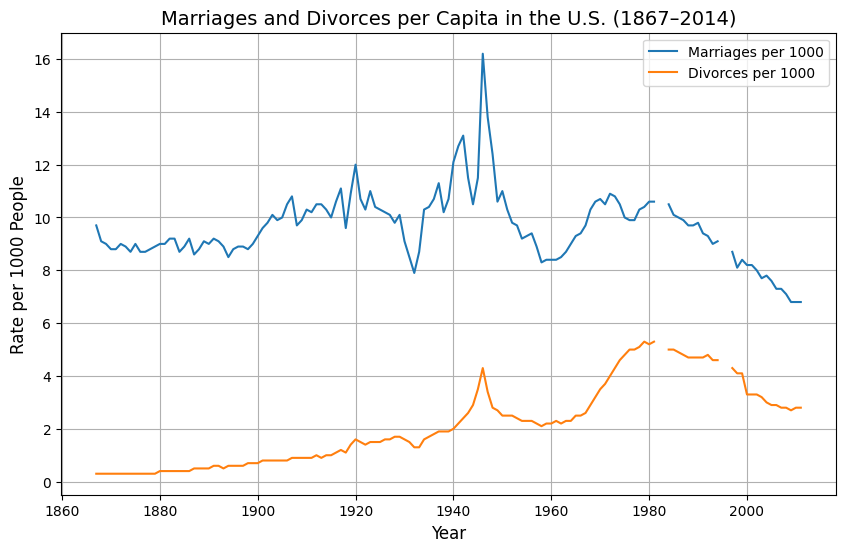

In [125]:
# Step 3: Creating the line plot for marriages and divorces per capita
plt.figure(figsize=(10, 6))

# Plotting marriages and divorces per capita
plt.plot(marriages_divorces['Year'], marriages_divorces['Marriages_per_1000'], label='Marriages per 1000')
plt.plot(marriages_divorces['Year'], marriages_divorces['Divorces_per_1000'], label='Divorces per 1000')

# Adding labels, title, and legend
plt.title('Marriages and Divorces per Capita in the U.S. (1867–2014)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Rate per 1000 People', fontsize=12)
plt.legend()

# Displaying the plot
plt.grid(True)
plt.show()

**Question 7**


Create a vertical bar chart comparing the number of marriages and divorces per
capita in the U.S. between 1900, 1950, and 2000.
Don't forget to label your axes!

In [127]:
# Filtering the data for the years 1900, 1950, and 2000
selected_years = marriages_divorces[marriages_divorces['Year'].isin([1900, 1950, 2000])]

# Displaying the filtered data
print(selected_years)

     Year  Marriages  Divorces  Population  Marriages_per_1000  \
33   1900   709000.0   56000.0    76094000                 9.3   
83   1950  1667000.0  385000.0   151684000                11.0   
133  2000  2315000.0  944000.0   282398000                 8.2   

     Divorces_per_1000  
33                 0.7  
83                 2.5  
133                3.3  


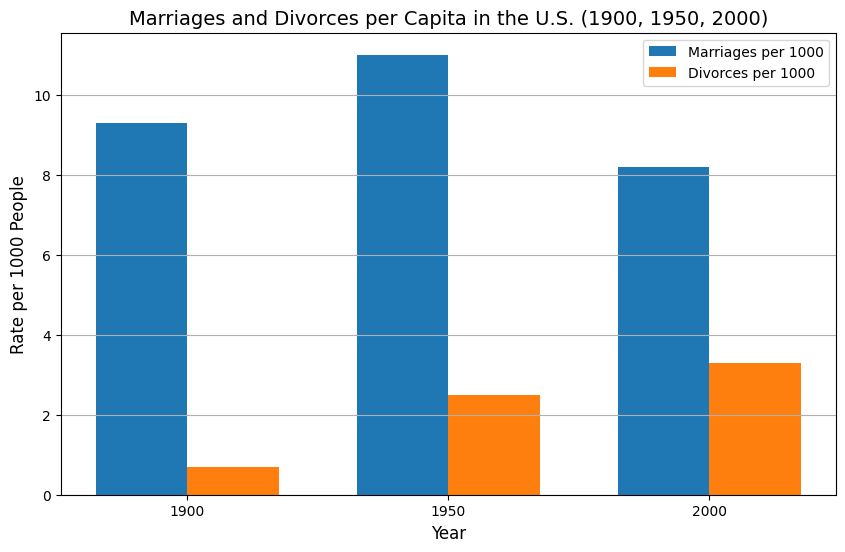

In [128]:
# Step 2: Creating the vertical bar chart
import numpy as np

# Setting positions for the bars
bar_width = 0.35  # Width of each bar
x = np.arange(len(selected_years['Year']))  # Positions for the bars

# Creating the bar chart
plt.figure(figsize=(10, 6))

# Marriages bar
plt.bar(x - bar_width/2, selected_years['Marriages_per_1000'], width=bar_width, label='Marriages per 1000')

# Divorces bar
plt.bar(x + bar_width/2, selected_years['Divorces_per_1000'], width=bar_width, label='Divorces per 1000')

# Adding labels, title, and legend
plt.title('Marriages and Divorces per Capita in the U.S. (1900, 1950, 2000)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Rate per 1000 People', fontsize=12)
plt.xticks(x, selected_years['Year'])  # Set x-axis labels as years
plt.legend()

# Displaying the plot
plt.grid(axis='y')
plt.show()


**Question 8**


Create a horizontal bar chart that compares the deadliest actors in Hollywood. Sort
the actors by their kill count and label each bar with the corresponding actor's name.
Don't forget to label your axes!


In [132]:
# Step 1: Loading the dataset
actor_kills = pd.read_csv('actor_kill_counts.csv')

# Displaying the first few rows to understand the structure
print(actor_kills.head())

                   Actor  Count
0  Arnold Schwarzenegger    369
1           Chow Yun-Fat    295
2         Clint Eastwood    207
3             Clive Owen    194
4         Dolph Lundgren    239


In [134]:
# Step 2: Sorting the data by kill count
actor_kills = actor_kills.sort_values(by='Count', ascending=True)

# Displaying the sorted data
print(actor_kills)

                   Actor  Count
9          Wesley Snipes    193
3             Clive Owen    194
5                 Jet Li    201
6           Nicolas Cage    204
2         Clint Eastwood    207
8    Tomisaburo Wakayama    226
4         Dolph Lundgren    239
7     Sylvester Stallone    267
1           Chow Yun-Fat    295
0  Arnold Schwarzenegger    369


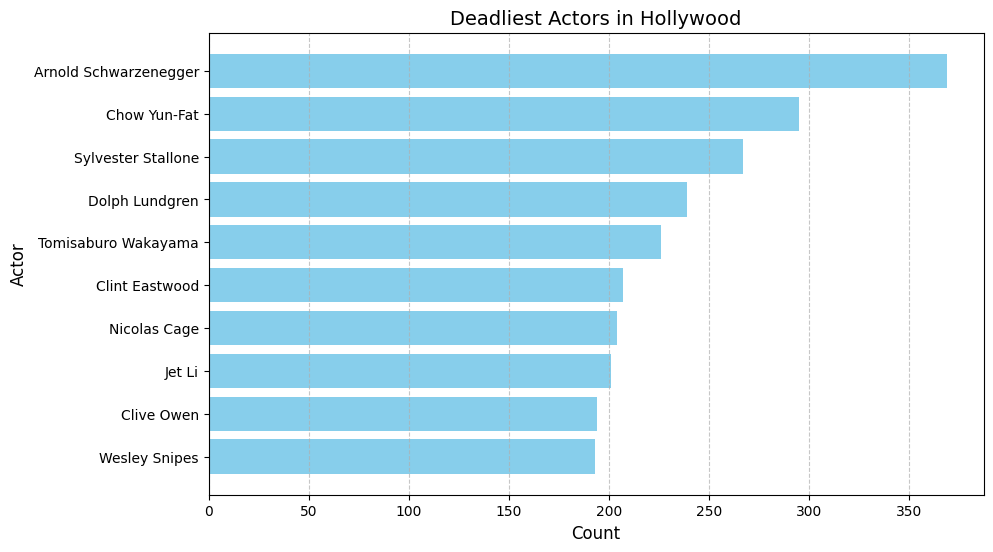

In [135]:
# Step 3: Creating the horizontal bar chart
plt.figure(figsize=(10, 6))

# Creating the bar chart
plt.barh(actor_kills['Actor'], actor_kills['Count'], color='skyblue')

# Adding labels and title
plt.title('Deadliest Actors in Hollywood', fontsize=14)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Actor', fontsize=12)

# Adding grid for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Displaying the plot
plt.show()

**Question 9**

Create a pie chart showing the fraction of all Roman Emperors that were
assassinated.
Make sure that the pie chart is an even circle, labels the categories, and shows the
percentage breakdown of the categories.


In [136]:
# Step 1: Loading the dataset
roman_emperors = pd.read_csv('roman-emperor-reigns.csv')

# Displaying the first few rows to understand the structure
print(roman_emperors.head())

    Emperor  Length_of_Reign         Cause_of_Death
0  Augustus            40.58  Possibly assassinated
1  Tiberius            22.50  Possibly assassinated
2  Caligula             4.83           Assassinated
3  Claudius            13.75  Possibly assassinated
4      Nero            13.67                Suicide


In [137]:
# Step 2: Counting the causes of death
death_counts = roman_emperors['Cause_of_Death'].value_counts()

# Displaying the counts
print("Counts of causes of death:")
print(death_counts)

Counts of causes of death:
Cause_of_Death
Assassinated             22
Natural causes           16
Possibly assassinated     8
Killed in battle          8
Suicide                   5
Illness                   5
Executed                  3
Died in captivity         1
Name: count, dtype: int64


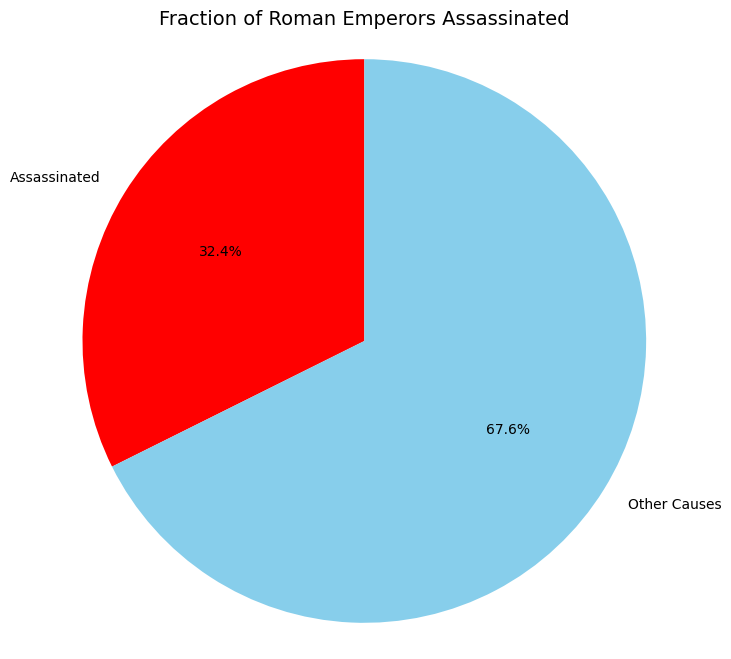

In [138]:
# Step 3: Highlighting assassinated emperors
# Creating a binary classification: Assassinated vs Other Causes
assassinated = death_counts.get('Assassinated', 0)
other_causes = death_counts.sum() - assassinated

# Data for the pie chart
pie_data = [assassinated, other_causes]
labels = ['Assassinated', 'Other Causes']
colors = ['red', 'skyblue']

# Creating the pie chart
plt.figure(figsize=(8, 8))
plt.pie(pie_data, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title('Fraction of Roman Emperors Assassinated', fontsize=14)

# Ensuring the pie chart is an even circle
plt.axis('equal')

# Displaying the chart
plt.show()

**Question 10**


Create a scatter plot showing the relationship between the total revenue earned by
arcades and the number of Computer Science PhDs awarded in the U.S. between
2000 and 2009.

In [139]:
# Step 1: Load the dataset
arcade_data = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')

# Display the first few rows to understand the structure
print(arcade_data.head())

   Year  Total Arcade Revenue (billions)  \
0  2000                            1.196   
1  2001                            1.176   
2  2002                            1.269   
3  2003                            1.240   
4  2004                            1.307   

   Computer Science Doctorates Awarded (US)  
0                                       861  
1                                       830  
2                                       809  
3                                       867  
4                                       948  


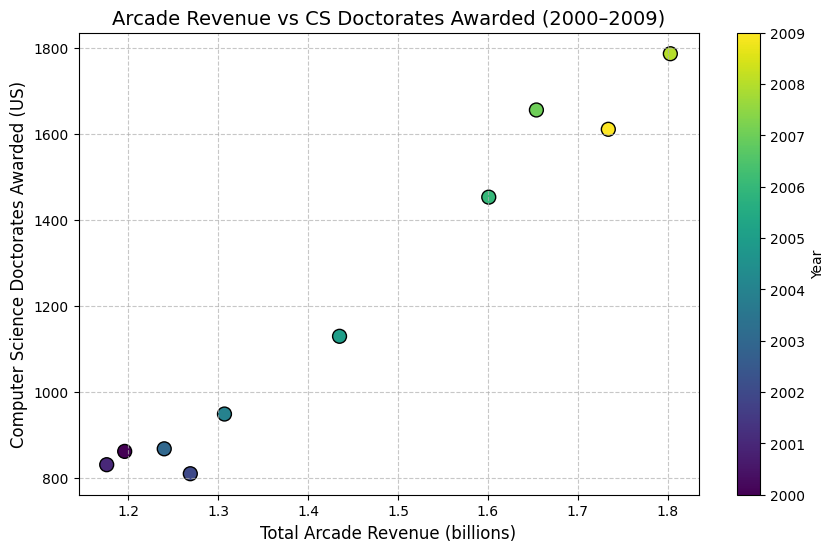

In [140]:
# Step 2: Creating the scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot with colors based on the year
scatter = plt.scatter(
    arcade_data['Total Arcade Revenue (billions)'],
    arcade_data['Computer Science Doctorates Awarded (US)'],
    c=arcade_data['Year'],
    cmap='viridis',
    edgecolor='k',
    s=100
)

# Adding color bar for the year
plt.colorbar(scatter, label='Year')

# Adding labels, title, and grid
plt.title('Arcade Revenue vs CS Doctorates Awarded (2000–2009)', fontsize=14)
plt.xlabel('Total Arcade Revenue (billions)', fontsize=12)
plt.ylabel('Computer Science Doctorates Awarded (US)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Displaying the plot
plt.show()